In [111]:
#Import packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px


path = "../data/cleanData/fullData.csv"

In [112]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'County Name'})
# Fill NA with zeros
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 46 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   County Name                                                                    88 non-null     object 
 1   Population Estimates, July 1 2021, (V2021)                                     88 non-null     int64  
 2   Persons under 5 years                                                          88 non-null     float64
 3   Persons under 18 years                                                         88 non-null     float64
 4   Persons 65 years and over                                                      88 non-null     float64
 5   Female persons                                                                 88 non-null     float64
 6   White alone                 

In [113]:
cols = df.columns[1:-1]
cols

Index(['Population Estimates, July 1 2021, (V2021)', 'Persons under 5 years',
       'Persons under 18 years', 'Persons 65 years and over', 'Female persons',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone', 'Two or More Races',
       'Hispanic or Latino', 'White alone, not Hispanic or Latino',
       'Veterans, 2017-2021', 'Foreign born persons, 2017-2021',
       'Housing units, July 1, 2021, (V2021)',
       'Owner-occupied housing unit rate, 2017-2021',
       'Median value of owner-occupied housing units, 2017-2021',
       'Median selected monthly owner costs -with a mortgage, 2017-2021',
       'Median selected monthly owner costs -without a mortgage, 2017-2021',
       'Median gross rent, 2017-2021', 'Building permits, 2021',
       'Households, 2017-2021', 'Persons per household, 2017-2021',
       'Living in same house 1 year ago of persons age 1

In [114]:
# Standardizing variables
col_names = cols
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,-0.483125,-0.447412,-0.470140,-0.519097,-0.477279,-0.555122,-0.298633,-0.361370,-0.336760,-0.443469,...,-0.611599,2.859044,-1.299905,-1.256369,-0.377214,-0.466494,-0.426027,-0.384019,-0.518448,1.348417
1,-0.146288,-0.116788,-0.123544,-0.148065,-0.157249,-0.166313,-0.081841,-0.148925,-0.256107,-0.443469,...,0.781452,-1.338013,-0.427729,-0.476045,-0.067375,-0.103306,-0.075990,-0.107990,-0.090283,-0.696448
2,-0.370552,-0.355427,-0.367705,-0.377799,-0.364848,-0.393802,-0.293436,-0.373987,-0.304214,-0.183195,...,-0.617740,-0.149690,-0.177553,-0.415425,-0.362336,-0.342502,-0.307773,-0.302899,-0.359232,-0.465933
3,-0.165977,-0.165662,-0.168057,-0.121405,-0.176084,-0.124667,-0.236881,-0.020722,-0.297611,0.040764,...,-0.418148,0.254846,-0.872869,-0.833725,-0.075566,-0.195011,-0.253848,-0.270554,-0.328175,2.681437
4,-0.326294,-0.403119,-0.422357,-0.414535,-0.324509,-0.352008,-0.270836,-0.235250,-0.176410,-0.134741,...,-0.266253,-0.731210,-1.087411,-1.171199,-0.144784,-0.343458,-0.350783,-0.338162,-0.359232,0.443611


In [138]:
bannedOrNot = df['Banned or not']
counties = df['County Name']
newdf = scaled_features.join(bannedOrNot)
newdf.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,-0.483125,-0.447412,-0.470140,-0.519097,-0.477279,-0.555122,-0.298633,-0.361370,-0.336760,-0.443469,...,2.859044,-1.299905,-1.256369,-0.377214,-0.466494,-0.426027,-0.384019,-0.518448,1.348417,0.0
1,-0.146288,-0.116788,-0.123544,-0.148065,-0.157249,-0.166313,-0.081841,-0.148925,-0.256107,-0.443469,...,-1.338013,-0.427729,-0.476045,-0.067375,-0.103306,-0.075990,-0.107990,-0.090283,-0.696448,1.0
2,-0.370552,-0.355427,-0.367705,-0.377799,-0.364848,-0.393802,-0.293436,-0.373987,-0.304214,-0.183195,...,-0.149690,-0.177553,-0.415425,-0.362336,-0.342502,-0.307773,-0.302899,-0.359232,-0.465933,0.0
3,-0.165977,-0.165662,-0.168057,-0.121405,-0.176084,-0.124667,-0.236881,-0.020722,-0.297611,0.040764,...,0.254846,-0.872869,-0.833725,-0.075566,-0.195011,-0.253848,-0.270554,-0.328175,2.681437,0.0
4,-0.326294,-0.403119,-0.422357,-0.414535,-0.324509,-0.352008,-0.270836,-0.235250,-0.176410,-0.134741,...,-0.731210,-1.087411,-1.171199,-0.144784,-0.343458,-0.350783,-0.338162,-0.359232,0.443611,0.0


In [157]:
clusteringDf = newdf.join(counties)
clusteringDf.to_csv("../data/cleanData/normalizedFullData.csv")


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x1440 with 0 Axes>

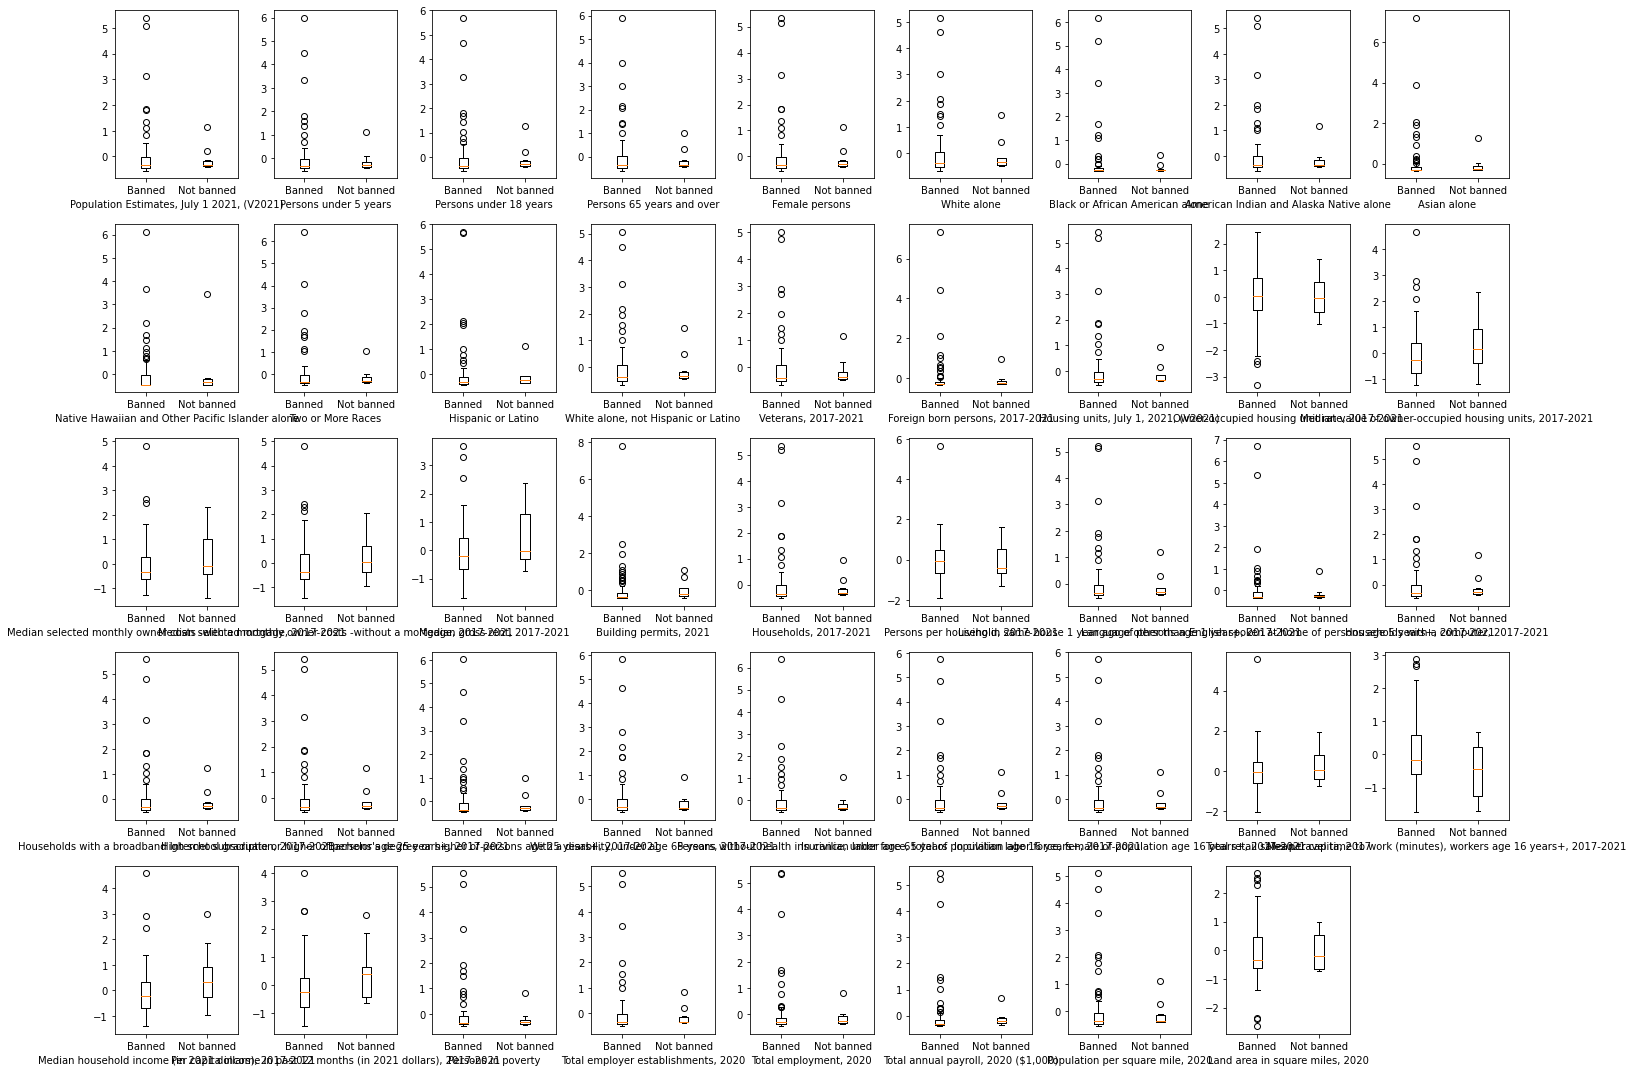

In [116]:
# visualizations to investigate what predictors may be relevant for detecting which counties are susceptible to implementing SB 52
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of valid and fraudulent usage")
fig, ax = plt.subplots(7, 7, figsize=(20,15))

for x, col in enumerate(newdf):
    if col == 'Banned or not':
        continue
    
    ax = plt.subplot(5, 9, x+1)

    plt.boxplot([newdf[newdf['Banned or not'] == 0][col],newdf[newdf['Banned or not'] == 1][col]], 
                labels=['Banned', 'Not banned'])
    
    plt.xlabel(col)
    
        
    
plt.tight_layout()
    
plt.show



/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warn

Text(0, 0.5, 'Inertia')

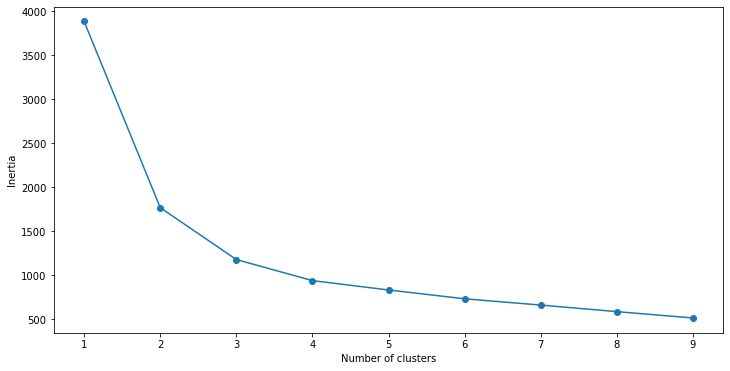

In [117]:
# Building the clustering model
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [118]:
# Silhouette coefficient: metric used to evaluate the quality of clusters created by the algorithm.
    # ranges from -1 to +1. The higher the silhouette score, the better the model.

# First, build a model with 4 clusters
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model
print(f"The silhouette score of this model is about: {round(silhouette_score(newdf, kmeans.labels_, metric='euclidean'),2)}")

/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


The silhouette score of this model is about: 0.43


/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


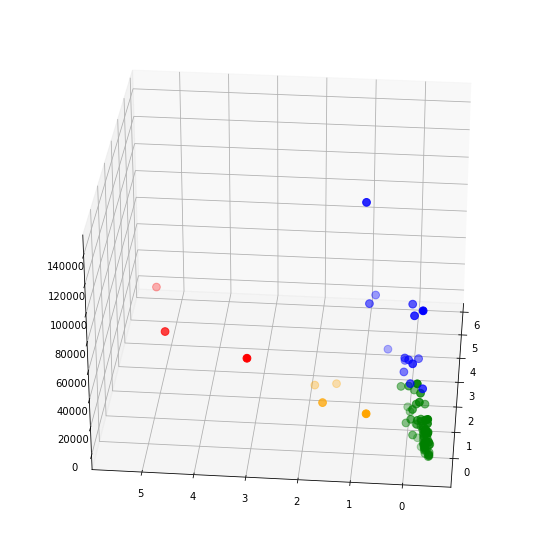

In [119]:
# visualize the clusters
clusters = kmeans.fit_predict(df.iloc[:,1:])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.loc[newdf.label == 0, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 0], df["Total employment, 2020"][newdf.label == 0], c='blue', s=60)


ax.scatter(newdf.loc[newdf.label == 1, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 1], newdf["Total employment, 2020"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.loc[newdf.label == 2, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 2], df["Total employment, 2020"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.loc[newdf.label == 3, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 3], newdf["Total employment, 2020"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

# Principal Component Analysis (PCA) Model 2

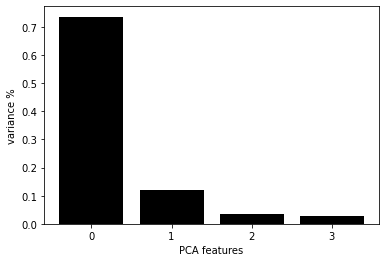

In [128]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

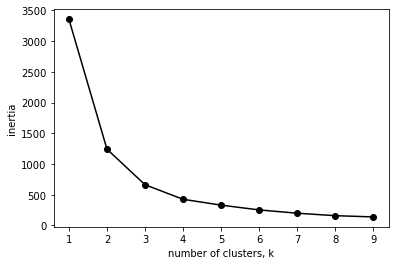

In [129]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [130]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.6151049962712762


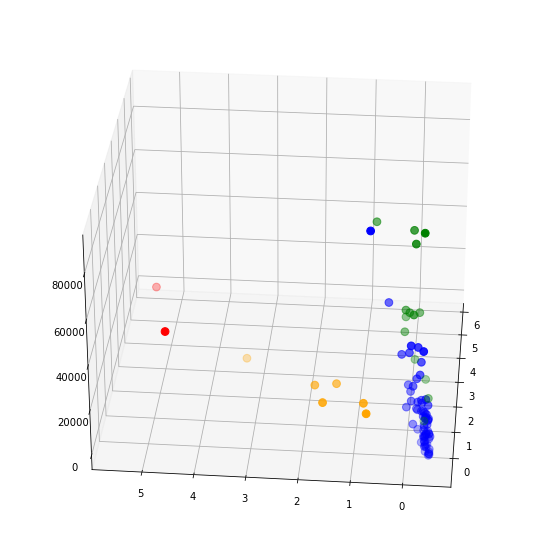

In [159]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.loc[newdf.label == 0, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 0], df["Total employment, 2020"][newdf.label == 0], c='blue', s=60)


ax.scatter(newdf.loc[newdf.label == 1, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 1], newdf["Total employment, 2020"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.loc[newdf.label == 2, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 2], df["Total employment, 2020"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.loc[newdf.label == 3, 'Persons 65 years and over'], newdf["Persons in poverty"][newdf.label == 3], newdf["Total employment, 2020"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

# Cluster Analysis

In [132]:
pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not,cluster
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0,1
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0,1
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0,1
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0,1
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0,1


In [133]:
avg_df = frame.groupby(['County Name','cluster', 'Banned or not'], as_index=False).mean()
avg_df

,County Name,cluster,Banned or not,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,...,"Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,"Adams County, Ohio",1,0.0,27542.0,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,...,9461.0,36.1,44467.0,24539.0,5205.44,385.0,4572.0,167427.0,47.1,583.87
1,"Allen County, Ohio",1,1.0,101670.0,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,...,16266.0,19.5,55114.0,28671.0,15555.51,2286.0,45012.0,1983272.0,253.9,402.55
2,"Ashland County, Ohio",1,0.0,52316.0,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,...,9431.0,24.2,58168.0,28992.0,5702.44,1034.0,18234.0,701075.0,124.0,422.99
3,"Ashtabula County, Ohio",1,0.0,97337.0,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,...,10406.0,25.8,49680.0,26777.0,15281.91,1806.0,24464.0,913850.0,139.0,702.07
4,"Athens County, Ohio",1,0.0,62056.0,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,...,11148.0,21.9,47061.0,24990.0,12969.70,1029.0,13265.0,469095.0,124.0,503.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"Washington County, Ohio",1,0.0,59423.0,2911.73,11765.75,13013.64,30008.62,56867.81,772.50,...,14565.0,23.2,54167.0,31375.0,8081.53,1351.0,22846.0,1062679.0,94.6,631.97
84,"Wayne County, Ohio",1,0.0,116710.0,7352.73,28243.82,21824.77,58238.29,111224.63,1867.36,...,11768.0,20.2,64594.0,30362.0,11204.16,2482.0,43423.0,1792709.0,210.7,554.79
85,"Williams County, Ohio",1,0.0,36716.0,2092.81,8114.24,7343.20,18321.28,35394.22,477.31,...,10145.0,17.9,55030.0,28831.0,3304.44,780.0,15739.0,623325.0,88.2,420.66
86,"Wood County, Ohio",2,0.0,132472.0,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,...,14333.0,20.7,66337.0,36047.0,14439.45,2701.0,57707.0,2719738.0,214.3,617.16


In [140]:
df2 = pd.DataFrame(frame.groupby(['cluster','County Name','Banned or not'])['Banned or not'].count())
df2


Banned or not
cluster County Name             Banned or not               
0       Cuyahoga County, Ohio   0.0                        1
        Franklin County, Ohio   0.0                        1
1       Adams County, Ohio      0.0                        1
        Allen County, Ohio      1.0                        1
        Ashland County, Ohio    0.0                        1
...                                                      ...
3       Hamilton County, Ohio   0.0                        1
        Lucas County, Ohio      0.0                        1
        Montgomery County, Ohio 0.0                        1
        Stark County, Ohio      0.0                        1
        Summit County, Ohio     0.0                        1

[88 rows x 1 columns]

In [136]:
###

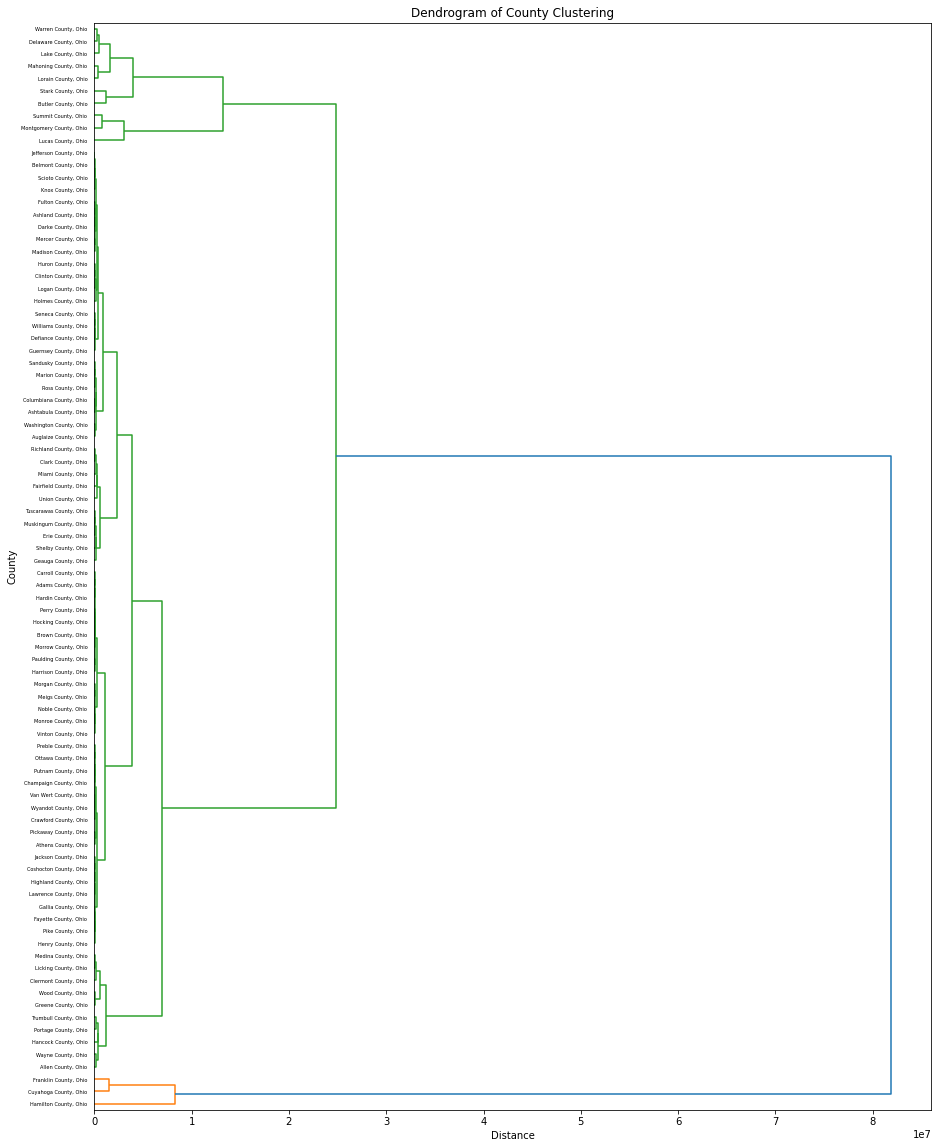

In [145]:
from scipy.cluster.hierarchy import linkage, dendrogram

# select relevant columns for clustering
X = df.iloc[:, 1:46]

# calculate linkage matrix using ward method
Z = linkage(X, method='ward')

# create dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(Z, labels=df['County Name'].values, orientation='right')

plt.title('Dendrogram of County Clustering')
plt.xlabel('Distance')
plt.ylabel('County')
plt.show()

# Splitting the data set into counties with bans and without bans

In [9]:
# Counties with bans
banned_counties = df[df['Banned or not'] == 1]
banned_counties

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
5,"Auglaize County, Ohio",46141,2814.60,11119.98,8766.79,22978.22,44710.63,322.99,138.42,276.85,...,19.1,69315,33720,3645.14,975,22072,990028,115.7,401.39,1.0
8,"Butler County, Ohio",390234,22633.57,91314.76,60486.27,197458.40,322723.52,38242.93,1170.70,16780.06,...,25.1,72281,34632,45267.14,7292,145687,7053119,836.7,466.52,1.0
16,"Crawford County, Ohio",41754,2296.47,9144.13,8893.60,21211.03,40250.86,501.05,125.26,250.52,...,24.1,48449,27866,5636.79,767,12093,450310,104.6,401.79,1.0
31,"Hancock County, Ohio",74656,4255.39,16349.66,13512.74,37402.66,69504.74,1642.43,298.62,1642.43,...,18.0,60828,34532,7465.60,1652,44318,2240851,141.0,531.33,1.0
41,"Knox County, Ohio",62897,3710.92,14403.41,11824.64,31762.98,60695.60,628.97,188.69,377.38,...,27.5,64439,29383,7862.12,1095,18357,733504,119.4,525.50,1.0
45,"Logan County, Ohio",46035,2624.00,10542.02,8792.69,23109.57,43411.00,920.70,138.10,414.32,...,22.1,64196,32868,4649.54,808,16703,789601,100.7,458.51,1.0
51,"Medina County, Ohio",183092,8971.51,39730.96,34970.57,91912.18,174303.58,2929.47,366.18,2563.29,...,27.2,82894,41100,11168.61,3978,54701,2461886,432.9,421.46,1.0
82,"Seneca County, Ohio",54906,3019.83,11914.60,10377.23,27288.28,51446.92,1482.46,164.72,439.25,...,20.7,56043,28992,6588.72,1025,16462,607851,99.9,551.03,1.0
84,"Union County, Ohio",64971,3963.23,15852.92,8446.23,33460.06,58214.02,1754.22,129.94,3703.35,...,25.9,96634,44442,3573.40,1083,25265,1591247,145.4,431.76,1.0


In [10]:
# Counties without bans
noBans_counties = df[df['Banned or not'] == 0]
noBans_counties

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0
6,"Belmont County, Ohio",65849,3094.90,12577.16,14289.23,32002.61,61371.27,2765.66,131.70,329.24,...,25.1,54191,28348,10469.99,1354,18059,697203,125.0,532.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Williams County, Ohio",36716,2092.81,8114.24,7343.20,18321.28,35394.22,477.31,146.86,220.30,...,17.9,55030,28831,3304.44,780,15739,623325,88.2,420.66,0.0
83,"Wood County, Ohio",132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,...,20.7,66337,36047,14439.45,2701,57707,2719738,214.3,617.16,0.0
85,"Wyandot County, Ohio",21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,...,22.9,61626,30596,1714.93,494,9495,425207,53.8,406.88,0.0
86,"Summit County, Ohio",537633,29032.18,111827.66,101612.64,275805.73,415590.31,82257.85,1075.27,23118.22,...,23.3,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79,0.0
